# Matrix processing and numpy

In [ ]:
import numpy
import json

In [ ]:
path = 'yelp_dataset/yelp_academic_dataset_review.json'
f = open(path, 'r', encoding = 'utf8')

In [ ]:
dataset = []

In [ ]:
while len(dataset) < 50_000:
    dataset.append(json.loads(f.readline()))

In [ ]:
dataset[0]

In [ ]:
ratings = [d['stars'] for d in dataset]

In [ ]:
cool = [d['cool'] for d in dataset]

In [ ]:
funny = [d['funny'] for d in dataset]

In [ ]:
useful = [d['useful'] for d in dataset]

In [ ]:
# converts lists to numpy arrays
ratings = numpy.array(ratings)
cool = numpy.array(cool)
funny = numpy.array(funny)
useful = numpy.array(useful)

In [ ]:
ratings

In [ ]:
# gives mean of array
numpy.mean(ratings)

In [ ]:
# gives variance of array
numpy.var(ratings)

In [ ]:
#creates an array by stacking the 3 arrays so it has 3 rows and 50,000 columns
numpy.stack([cool, funny, useful])

In [ ]:
# creates a Transpost of the array
features = numpy.stack([cool, funny, useful]).T

In [ ]:
features = numpy.matrix(features)

In [ ]:
features.T * features

In [ ]:
# gives you the inverse of the matrix
numpy.linalg.inv(features.T * features)

In [ ]:
# numpy.sin applies the sin function to every element in the matrix
2*numpy.sin(features) + 3

In [ ]:
# can apply logic to see if a statement is true or false
2*numpy.sin(features) + 3 > 4

In [ ]:
import numpy
numpy.eye(3)

# Introduction to Data Visualization

In [ ]:
import json
import time
path = 'yelp_dataset/yelp_academic_dataset_review.json'
f = open(path, 'r', encoding = 'utf8')

In [ ]:
dataset = []
for i in range(50_000):
    dataset.append(json.loads(f.readline()))

In [ ]:
datasetWithTimeValues = []

In [ ]:
for d in dataset:
    d['date']
    d['timeStruct'] = time.strptime(d['date'], '%Y-%m-%d %H:%M:%S')
    d['timeInt'] = time.mktime(d['timeStruct'])
    datasetWithTimeValues.append(d)

In [ ]:
from collections import defaultdict

In [ ]:
weekRatings = defaultdict(list)

In [ ]:
for d in datasetWithTimeValues:
    day = d['timeStruct'].tm_wday
    weekRatings[day].append(d['stars'])

In [ ]:
weekAverages = {}

In [ ]:
for d in weekRatings:
    weekAverages[d] = sum(weekRatings[d]) * 1.0 / len(weekRatings[d])

In [ ]:
weekAverages

In [ ]:
X = list(weekAverages.keys())

In [ ]:
Y = [weekAverages[x] for x in X]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(X,Y)

In [ ]:
plt.ylim(3.6, 3.8)
plt.xlabel('Weekday')
plt.ylabel('Rating')
plt.xticks([0,1,2,3,4,5,6],['S', 'M','T','W','T','F','S'])
plt.title('Rating as a function of weekday')
plt.bar(X,Y)

# Live coding MatPlotLib

In [1]:
import json
import time
path = 'yelp_dataset/yelp_academic_dataset_review.json'
f = open(path, 'r', encoding = 'utf8')

In [2]:
dataset = []
for i in range(50_000):
    d = json.loads(f.readline())
    d['timeStruct'] = time.strptime(d['date'], '%Y-%m-%d %H:%M:%S')
    d['timeInt'] = time.mktime(d['timeStruct'])
    dataset.append(d)

In [3]:
dataset[0]

{'review_id': 'xQY8N_XvtGbearJ5X4QryQ',
 'user_id': 'OwjRMXRC0KyPrIlcjaXeFQ',
 'business_id': '-MhfebM0QIsKt87iDN-FNw',
 'stars': 2.0,
 'useful': 5,
 'funny': 0,
 'cool': 0,
 'text': 'As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas. When I saw they would be showing infamous eggs of the House of Faberge from the Virginia Museum of Fine Arts (VMFA), I knew I had to go!\n\nTucked away near the gelateria and the garden, the Gallery is pretty much hidden from view. It\'s what real estate agents would call "cozy" or "charming" - basically any euphemism for small.\n\nThat being said, you can still see wonderful art at a gallery of any size, so why the two *s you ask? Let me tell you:\n\n* pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top. For the space and the amount of art you can fit in there, it is a bit much.\n* it\'s not kid friendly at all. Seriously, don\'t bring them.

In [4]:
from collections import defaultdict

In [5]:
weekRatings = defaultdict(list)

In [6]:
for d in dataset:
    day = d['timeStruct'].tm_wday
    weekRatings[day]. append(d['stars'])

In [7]:
weekAverages = {}

In [8]:
for d in weekRatings:
    weekAverages[d] = sum(weekRatings[d])/len(weekRatings[d])

In [9]:
weekAverages

{2: 3.733379597501735,
 5: 3.7657114127702362,
 4: 3.77428350116189,
 1: 3.7762811127379208,
 3: 3.7829129610730425,
 0: 3.6974025974025975,
 6: 3.730328396651642}

In [10]:
from matplotlib import pyplot as plt

In [11]:
x = list(sorted(weekAverages.keys()))

In [12]:
x

[0, 1, 2, 3, 4, 5, 6]

In [13]:
y = [weekAverages[i] for i in x]

In [14]:
y

[3.6974025974025975,
 3.7762811127379208,
 3.733379597501735,
 3.7829129610730425,
 3.77428350116189,
 3.7657114127702362,
 3.730328396651642]

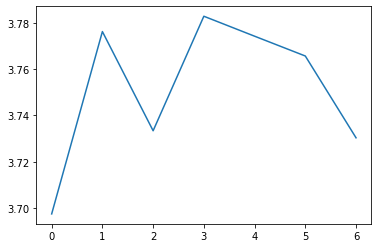

In [15]:
plt.plot(x,y)


<BarContainer object of 7 artists>

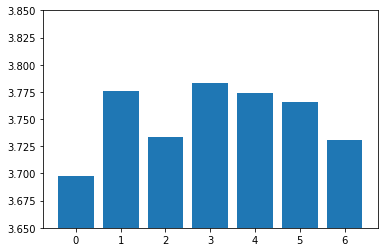

In [16]:
plt.ylim(3.65, 3.85)
plt.bar(x,y)

<BarContainer object of 7 artists>

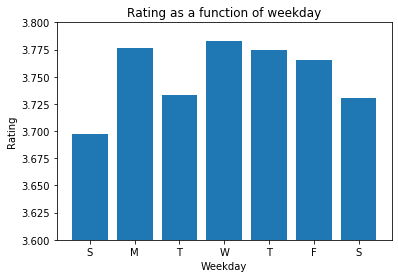

In [17]:
plt.ylim(3.6, 3.8)
plt.xlabel('Weekday')
plt.ylabel('Rating')
plt.xticks([0,1,2,3,4,5,6],['S', 'M','T','W','T','F','S'])
plt.title('Rating as a function of weekday')
plt.bar(x,y)

# urllib and BeautifulSoup

In [1]:
from urllib.request import urlopen

In [2]:
f = urlopen('https://www.goodreads.com/book/show/4671.The_Great_Gatsby')

In [3]:
# acts like a file object once opened
html = str(f.read())

In [4]:
html

'b\'<!DOCTYPE html>\\n<html class="desktop withSiteHeaderTopFullImage\\n">\\n<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# good_reads: http://ogp.me/ns/fb/good_reads#">\\n  <title>The Great Gatsby by F. Scott Fitzgerald</title>\\n\\n<meta content="The Great Gatsby book. Read 67,353 reviews from the world\\\'s largest community for readers. Alternate Cover Edition ISBN: 0743273567 (ISBN13: 978074327356..." name=\\\'description\\\'>\\n<meta content=\\\'telephone=no\\\' name=\\\'format-detection\\\'>\\n<link href=\\\'https://www.goodreads.com/book/show/4671.The_Great_Gatsby\\\' rel=\\\'canonical\\\'>\\n    <meta content=\\\'2415071772\\\' property=\\\'fb:app_id\\\'>\\n<meta content=\\\'books.book\\\' property=\\\'og:type\\\'>\\n<meta content=\\\'The Great Gatsby\\\' property=\\\'og:title\\\'>\\n<meta content="Alternate Cover Edition ISBN: 0743273567 (ISBN13: 9780743273565)  The Great Gatsby, F. Scott Fitzgerald\\\'s third book, stands as the supre..." property=\\\'og:descri

In [5]:
reviews = html.split('<div id="review_')[1:]

In [6]:
len(reviews)

30

In [7]:
reviews[0]

'101057684" class="review nosyndicate" itemprop="reviews" itemscope itemtype="http://schema.org/Review">\\n  <link itemprop="url" href="https://www.goodreads.com/review/show/101057684" />\\n    <a title="Nataliya" class="left imgcol" href="/user/show/3672777-nataliya"><img alt="Nataliya" src="https://images.gr-assets.com/users/1584921623p2/3672777.jpg" /></a>\\n\\n  <div class="left bodycol">\\n    <div class="reviewHeader uitext stacked">\\n        <a class="reviewDate createdAt right" href="/review/show/101057684?book_show_action=true">May 02, 2010</a>\\n\\n      <span itemprop="author" itemscope itemtype="http://schema.org/Person">\\n        <a title="Nataliya" class="user" itemprop="url" name="Nataliya" href="/user/show/3672777-nataliya">Nataliya</a>\\n      </span>\\n\\n        rated it\\n        <span class=" staticStars notranslate" title="it was amazing"><span size="15x15" class="staticStar p10">it was amazing</span><span size="15x15" class="staticStar p10"></span><span size="1

In [8]:
def parseReview(review):
    d = {}
    d['stars'] = review.split('<span class=" staticStars" title="')[1].split('"')[0]
    d['date'] = review.split('<a class="reviewDate')[1].split('>')[1].split('<')[0]
    d['user'] = review.split('<a title="')[1].split('"')[0]
    shelves = []
    try:
        shelfBlock = review.split('<div class="uitext grayText bookshelves">')[1].split('</div')[0]
        for s in shelfBlock.split('shelf=')[1:]:
            shelves.append(s.split('"')[0])
        d['shelves'] = shelves
    except Exception as e:
        pass
    reviewBlock = review.split('<div class="reviewText stacked">')[1].split('</div')[0]
    d['reviewBlock'] = reviewBlock
    return d

In [9]:
reviewDict = [parseReview(r) for r in reviews]

IndexError: list index out of range

In [10]:
from bs4 import BeautifulSoup

In [11]:
soup = BeautifulSoup(reviewDict[0]['reviewBlock'])

NameError: name 'reviewDict' is not defined

In [12]:
soup.text

NameError: name 'soup' is not defined